In [3]:
graphics_toolkit("gnuplot"); % use if "plot" does not work

## Finite element method (FEM) in 1d

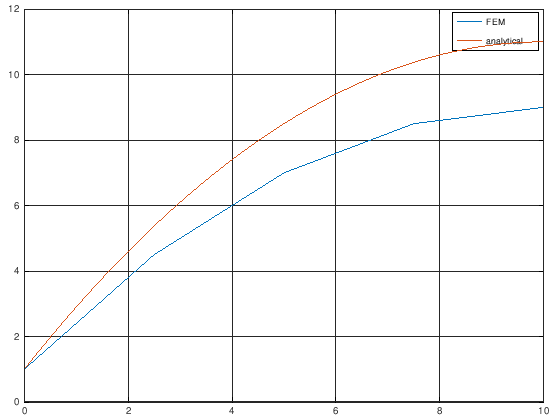

In [6]:
%% boundary value problem:
%   -k*u''(x)=f     in (0,L)
%        u(0)=U
%    -k*u'(L)=T

f=0.2;
k=1;
L=10;
U=1;
T=0;

%% preparation
N=4; % number of intervals of the discretization
NODES=linspace(0,L,N+1); % all points (matrix of size (N+1)*dim)
n_NODES=length(NODES); % number of nodes of the discretization
ELEMENTS=[1:N; 2:N+1]'; % matrix of INDICES of elements
n_ELEMENTS=size(ELEMENTS,1); % number of elements (equals N in 1d)
DBOUNDARY=[1]; % vector of indices of Dirichlet boundary nodes
DVALUE=[U]; % Dirichlet values in this boundary nodes
FREENODE=true(n_NODES,1); FREENODE(DBOUNDARY)=false; % vector of indices of nodes without D. b. c.
NBOUNDARY=[N+1]; % vector of indices of Neumann boundary nodes
NVALUE=[T]; % Neumann values in this boundary nodes
LENGTHS=NODES(ELEMENTS(:,2))-NODES(ELEMENTS(:,1)); % vector of legths of all elements
MATERIALS=k*ones(n_ELEMENTS,1); % vector of material values at each element
F=f*ones(n_ELEMENTS,1); % vector of source function values at each element

%% local matrix and rhs
A_local=[1 -1; -1 1]; % local matrix 2x2
b_local=[1 1]'; % local r. h. s. 2x1

%% global matrix and rhs
A=zeros(n_NODES);
b=zeros(n_NODES,1);
for i=1:n_ELEMENTS
    A(ELEMENTS(i,:),ELEMENTS(i,:))=A(ELEMENTS(i,:),ELEMENTS(i,:))+A_local*MATERIALS(i)/LENGTHS(i);
    b(ELEMENTS(i,:))=b(ELEMENTS(i,:))+b_local*F(i);
end

%% boundary conditions
u=zeros(n_NODES,1);
u(~FREENODE)=DVALUE;
b=b-A*u;
b(NBOUNDARY)=b(NBOUNDARY)-NVALUE;
u(FREENODE)=A(FREENODE,FREENODE)\b(FREENODE);
figure; 
plot(NODES,u); hold on

%% analytical solution
u=@(x)-f/(2*k)*x.^2+(f*L-T)*x/k+U;
x=linspace(0,L,100);        % points of visualization
hold on; plot(x,u(x))       % plot of the analytical solution
legend('FEM','analytical');
grid on